# Project Name - **Uber**
Predict the fare amount of future rides.
## Problem Statement -
The fare amount of a ride is influenced by various factors such as distance, duration, traffic conditions, time of day, and demand. Your goal is to develop a regression model that can predict the fare amount based on these factors. You will work with a dataset that includes historical ride data, including the fare amount and relevant features.

### Importing required Libraries:

In [121]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [122]:
# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd
# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

# Import SKLearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

##1. Data Preprocessing:
Uber DataFrame file that is "uber.csv" as uber

###Import and Understanding Data:-

In [123]:
# Loading DataFrame
uber = pd.read_csv("uber.csv")

###Inspecting and Understanding the Dataframe :-

In [124]:
# Check the head of the DataSet.It's quickly get an idea & overview of the data and its structure.
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [125]:
# Check the shape of uber DataSet
uber.shape

(200000, 9)

Finding the DataSet has 200000 Rows, 9 Columns

In [126]:
# 'Info()' Code gives the Information about data types and missing values:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [127]:
# 'Describe()' code gives Summary Statistic of about Leads Dataset
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


###Data Processing:-

Checking Missing/Nan value:

In [128]:
# Check the missing values
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [129]:
# Checking the percentage of missing values
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Unnamed: 0           0.0
key                  0.0
fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

### Handaling Missing Values :-

***Note*** - I observed Missing/Null value is very minor.it's handle with "Imputation" or "fillna()".

In [130]:
# Imputing the missing value with mean:
uber['dropoff_longitude'].fillna(uber['dropoff_longitude'].mean(), inplace=True)

In [131]:
# Imputing the missing value with mean:
uber['dropoff_latitude'].fillna(uber['dropoff_latitude'].mean(), inplace=True)

In [132]:
# Check the missing values
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [133]:
# Recheck Null/Missing value by 'info()'
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  200000 non-null  float64
 7   dropoff_latitude   200000 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Now, don't have any missing value

In [134]:
# check count of Duplicate
uber.duplicated().sum()

0

Calculate the Distance of Ride in km:-

In [135]:
# Calculate the distance of the ride
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the Earth in kilometers
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [136]:
# Apply the function to create a new column 'distance_km'
uber['distance_km'] = haversine(uber['pickup_longitude'], uber['pickup_latitude'], uber['dropoff_longitude'], uber['dropoff_latitude'])
uber['distance_km']

0          1.683323
1          2.457590
2          5.036377
3          1.661683
4          4.475450
            ...    
199995     0.112210
199996     1.875050
199997    12.850319
199998     3.539715
199999     5.417783
Name: distance_km, Length: 200000, dtype: float64

Finding Outliers :-

In [137]:
# Checking for outliers in the continuous & target variables
Out_uber = uber[['distance_km','fare_amount']]

In [138]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
Out_uber.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,distance_km,fare_amount
count,200000.000000,200000.000000
mean,20.856014,11.359955
std,382.963800,9.901776
min,0.000000,-52.000000
25%,1.215222,6.000000
50%,2.121005,8.500000
75%,3.875248,12.500000
90%,7.022836,20.500000
95%,10.112757,30.330000
99%,20.722392,53.300000


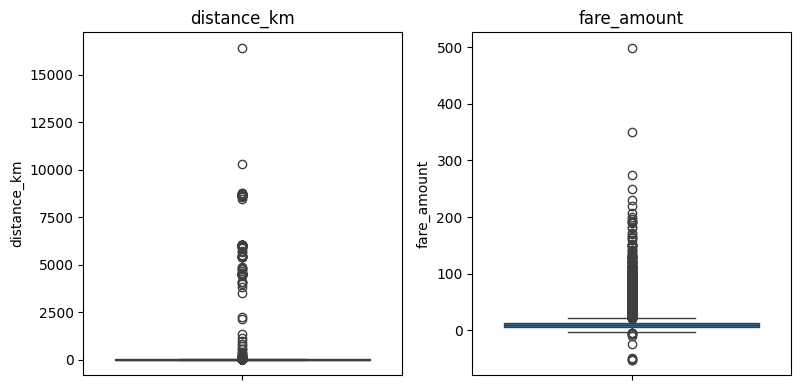

In [139]:
# Visualize Outlier by using boxplot
plt.figure(figsize=(12, 4))

# TotalVisits
plt.subplot(1, 3, 1)
sns.boxplot(uber['distance_km'])
plt.title('distance_km')

# Total Time Spent on Website
plt.subplot(1, 3, 2)
sns.boxplot(uber['fare_amount'])
plt.title('fare_amount')
plt.tight_layout()
plt.show()

In [140]:
# Calculate & Balance Outlier at the 90% percentile
q1=uber['distance_km'].quantile(0.25)
q3=uber['distance_km'].quantile(0.90)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
uber.loc[uber['distance_km']>=ub,'distance_km']=ub
uber.loc[uber['distance_km']<=lb,'distance_km']=lb

In [141]:
# Calculate & Balance Outlier at the 75% percentile
q1=uber['fare_amount'].quantile(0.30)
q3=uber['fare_amount'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
uber.loc[uber['fare_amount']>=ub,'fare_amount']=ub
uber.loc[uber['fare_amount']<=lb,'fare_amount']=lb

In [142]:
# Rechecking outliers at 25%, 50%, 75%, 90%, 95% and 99%
Out_uber.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,distance_km,fare_amount
count,200000.000000,200000.000000
mean,20.856014,11.359955
std,382.963800,9.901776
min,0.000000,-52.000000
25%,1.215222,6.000000
50%,2.121005,8.500000
75%,3.875248,12.500000
90%,7.022836,20.500000
95%,10.112757,30.330000
99%,20.722392,53.300000


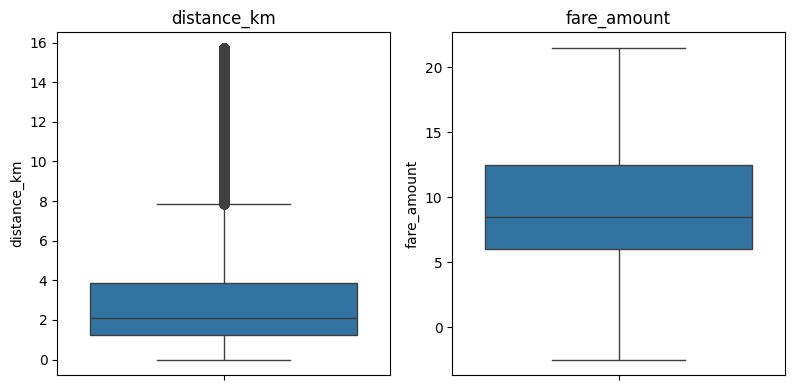

In [143]:
# Revisualize Outlier by using boxplot
plt.figure(figsize=(12, 4))

# TotalVisits
plt.subplot(1, 3, 1)
sns.boxplot(uber['distance_km'])
plt.title('distance_km')

# Total Time Spent on Website
plt.subplot(1, 3, 2)
sns.boxplot(uber['fare_amount'])
plt.title('fare_amount')
plt.tight_layout()
plt.show()

###Feature Engineering:-

In [144]:
# Convert pickup_datetime to datetime object
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])
uber['pickup_datetime']

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [145]:
# Extract hour of week from pickup_datetime
uber['pickup_hour'] = uber['pickup_datetime'].dt.hour
uber['pickup_hour']

0         19
1         20
2         21
3          8
4         17
          ..
199995    10
199996     1
199997     0
199998    14
199999     4
Name: pickup_hour, Length: 200000, dtype: int32

In [146]:
# Extract day of week from pickup_datetime
uber['pickup_day_of_week'] = uber['pickup_datetime'].dt.dayofweek
uber['pickup_day_of_week']

0         3
1         4
2         0
3         4
4         3
         ..
199995    6
199996    4
199997    0
199998    2
199999    5
Name: pickup_day_of_week, Length: 200000, dtype: int32

In [147]:
# Create time-based features
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'time_of_day'
uber['time_of_day'] = uber['pickup_hour'].apply(get_time_of_day)
uber['time_of_day']

0           Evening
1           Evening
2           Evening
3           Morning
4           Evening
            ...    
199995      Morning
199996        Night
199997        Night
199998    Afternoon
199999        Night
Name: time_of_day, Length: 200000, dtype: object

In [148]:
# Create distance categories
def get_distance_category(distance):
    if distance < 2:
        return 'Short'
    elif 2 <= distance <= 10:
        return 'Medium'
    else:
        return 'Long'

# Apply the function to create a new column 'distance_category'
uber['distance_category'] = uber['distance_km'].apply(get_distance_category)
uber['distance_category']

0          Short
1         Medium
2         Medium
3          Short
4         Medium
           ...  
199995     Short
199996     Short
199997      Long
199998    Medium
199999    Medium
Name: distance_category, Length: 200000, dtype: object

In [149]:
# Display the first few rows of the modified dataframe
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day_of_week,time_of_day,distance_category
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,3,Evening,Short
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,4,Evening,Medium
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,0,Evening,Medium
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,4,Morning,Short
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,3,Evening,Medium


##2. Exploratory Data Analysis(EDA):-

### Univariate Analysis:-

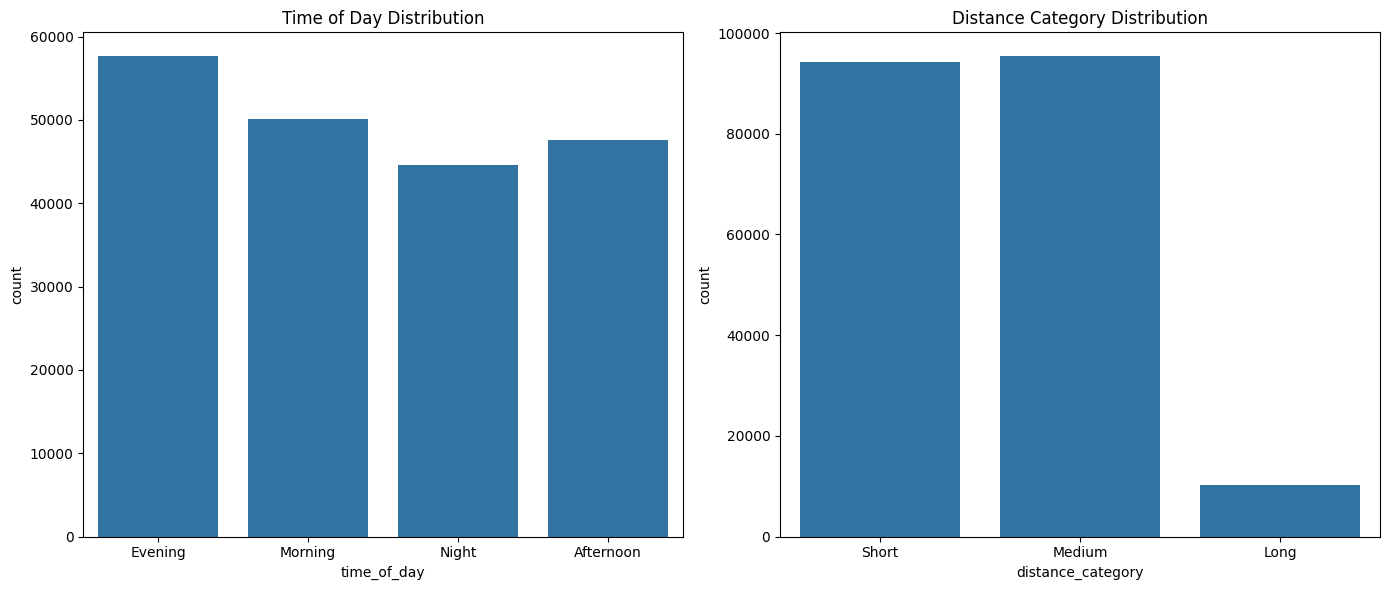

In [150]:
# Plot the distribution of the new variable
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='time_of_day', data=uber)
plt.title('Time of Day Distribution')
plt.subplot(1, 2, 2)
sns.countplot(x='distance_category', data=uber)
plt.title('Distance Category Distribution')
plt.tight_layout()
plt.show()

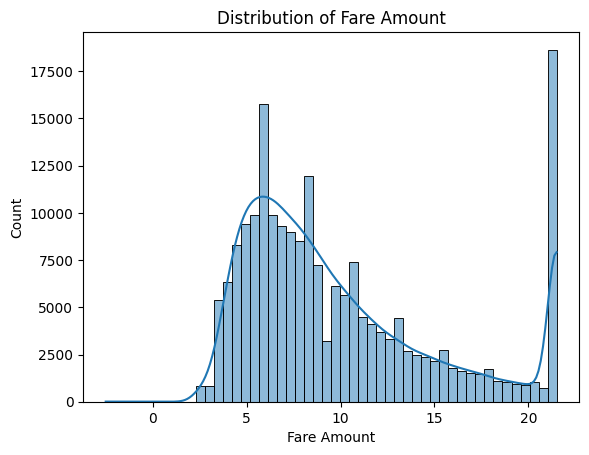

In [151]:
# Plot the distribution of the fare amount
sns.histplot(uber['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Count')
plt.show()


### Bivariate Analysis:-

Text(0.5, 1.0, 'Fare Amount with distance_category')

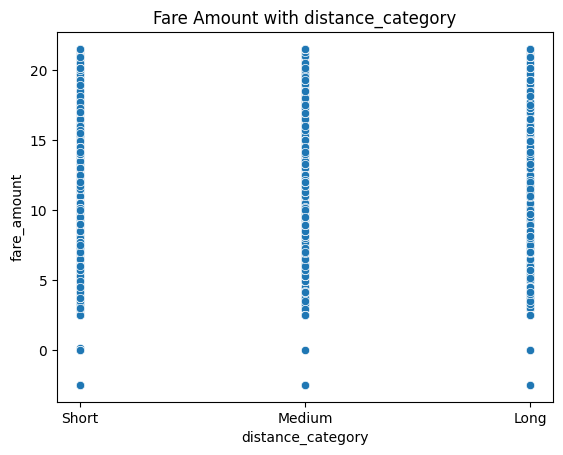

In [152]:
# Visualization with scatter plots relationships between fare amount and Distance Category
sns.scatterplot(x='distance_category', y='fare_amount', data=uber)
plt.title('Fare Amount with distance_category')

Text(0.5, 1.0, 'Fare Amount with time_of_day')

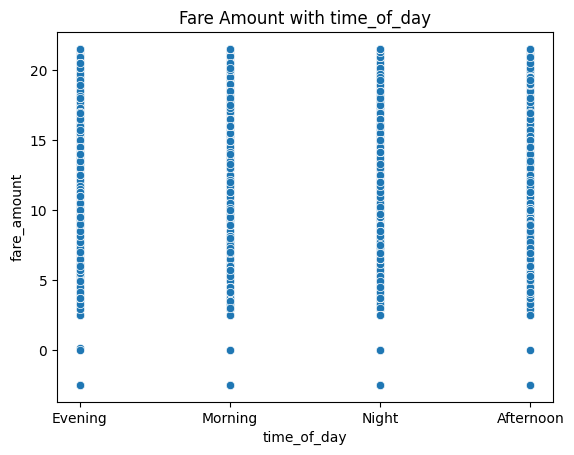

In [153]:
# Visualization with scatter plots relationships between fare amount and Time of day
sns.scatterplot(x='time_of_day', y='fare_amount', data=uber)
plt.title('Fare Amount with time_of_day')

Text(0.5, 1.0, 'Fare Amount with Pickup Day of Week')

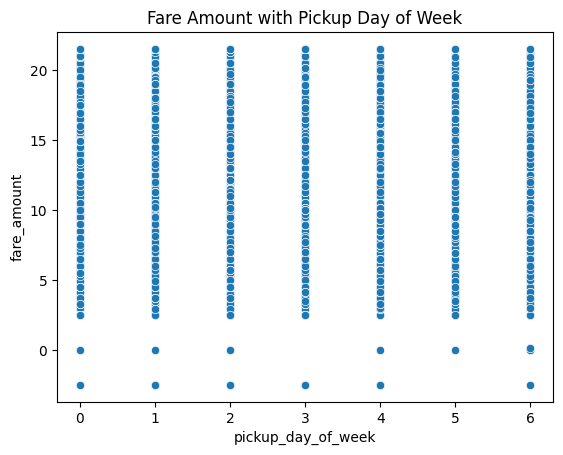

In [154]:
# Visualization with scatter plots relationships between fare amount and Pick day of week
sns.scatterplot(x='pickup_day_of_week', y='fare_amount', data=uber)
plt.title('Fare Amount with Pickup Day of Week')

Text(0.5, 1.0, 'Fare Amount with Passenger Count')

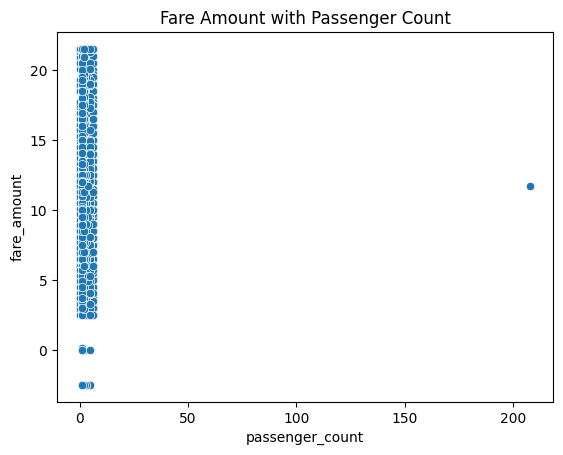

In [155]:
# Visualization with scatter plots relationships between fare amount and passanger count
sns.scatterplot(x='passenger_count', y='fare_amount', data=uber)
plt.title('Fare Amount with Passenger Count')

Text(0.5, 1.0, 'Fare Amount with distance_km')

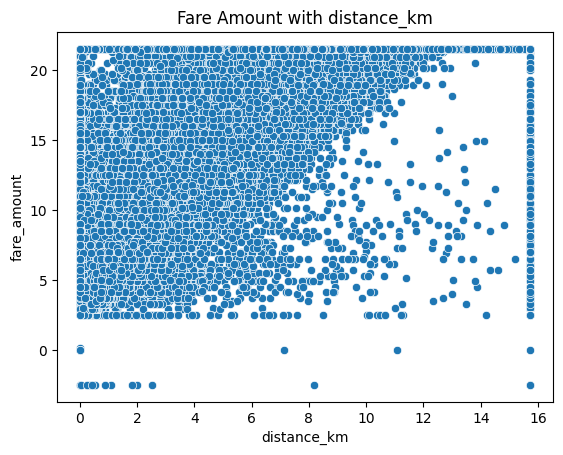

In [156]:
# Visualization with scatter plots relationships between fare amount and distance in km
sns.scatterplot(x='distance_km', y='fare_amount', data=uber)
plt.title('Fare Amount with distance_km')

Text(0.5, 1.0, 'passenger_count with time_of_day')

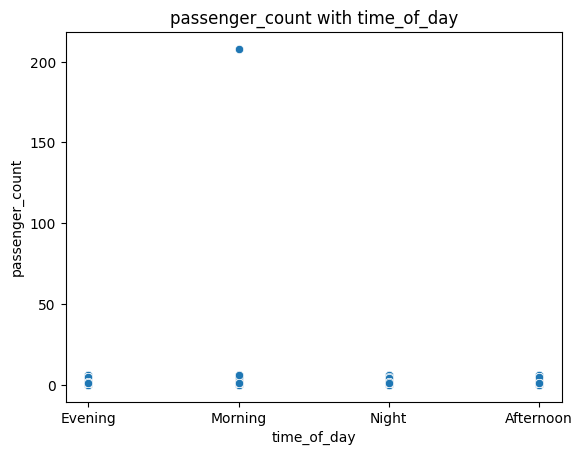

In [157]:
# Visualization rush with scatter plots relationships between passanger count and time of day
sns.scatterplot(x='time_of_day', y='passenger_count', data=uber)
plt.title('passenger_count with time_of_day')

In [158]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day_of_week,time_of_day,distance_category
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,3,Evening,Short
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,4,Evening,Medium
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,0,Evening,Medium
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,4,Morning,Short
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,3,Evening,Medium


Drop some unusual columns for the further observations.

In [159]:
# Convert datetime columns to numeric representation because 'pickup_datetime' is the problematic column
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])
uber['pickup_datetime'] = uber['pickup_datetime'].astype('int64') // 10**9  # Convert to Unix timestamp (seconds)
uber['pickup_datetime']

0         1431028326
1         1247861096
2         1251150300
3         1246004541
4         1409248020
             ...    
199995    1351421340
199996    1394759340
199997    1246236120
199998    1432133785
199999    1273896480
Name: pickup_datetime, Length: 200000, dtype: int64

In [160]:
# Convert 'pickup_datetime' to datetime if necessary
if uber['pickup_datetime'].dtype != 'datetime64[ns]':
    uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])

In [161]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day_of_week,time_of_day,distance_category
0,24238194,2015-05-07 19:52:06.0000003,7.5,1970-01-01 00:00:01.431028326,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,3,Evening,Short
1,27835199,2009-07-17 20:04:56.0000002,7.7,1970-01-01 00:00:01.247861096,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,4,Evening,Medium
2,44984355,2009-08-24 21:45:00.00000061,12.9,1970-01-01 00:00:01.251150300,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,0,Evening,Medium
3,25894730,2009-06-26 08:22:21.0000001,5.3,1970-01-01 00:00:01.246004541,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,4,Morning,Short
4,17610152,2014-08-28 17:47:00.000000188,16.0,1970-01-01 00:00:01.409248020,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,3,Evening,Medium


### Encode Categorical Variables:(Create Dummy Variable):-

In [162]:
time_of_day_dummy = pd.get_dummies(uber['time_of_day'],drop_first=True, dtype = 'int')
time_of_day_dummy

,Evening,Morning,Night
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
199995,0,1,0
199996,0,0,1
199997,0,0,1
199998,0,0,0


In [163]:
uber=pd.concat([uber,time_of_day_dummy],axis=1)
uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day_of_week,time_of_day,distance_category,Evening,Morning,Night
0,24238194,2015-05-07 19:52:06.0000003,7.5,1970-01-01 00:00:01.431028326,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,3,Evening,Short,1,0,0
1,27835199,2009-07-17 20:04:56.0000002,7.7,1970-01-01 00:00:01.247861096,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,4,Evening,Medium,1,0,0
2,44984355,2009-08-24 21:45:00.00000061,12.9,1970-01-01 00:00:01.251150300,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,0,Evening,Medium,1,0,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,1970-01-01 00:00:01.246004541,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,4,Morning,Short,0,1,0
4,17610152,2014-08-28 17:47:00.000000188,16.0,1970-01-01 00:00:01.409248020,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,3,Evening,Medium,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,1970-01-01 00:00:01.351421340,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,10,6,Morning,Short,0,1,0
199996,16382965,2014-03-14 01:09:00.0000008,7.5,1970-01-01 00:00:01.394759340,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,1,4,Night,Short,0,0,1
199997,27804658,2009-06-29 00:42:00.00000078,21.5,1970-01-01 00:00:01.246236120,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,0,0,Night,Long,0,0,1
199998,20259894,2015-05-20 14:56:25.0000004,14.5,1970-01-01 00:00:01.432133785,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,14,2,Afternoon,Medium,0,0,0


In [164]:
distance_category_dummy = pd.get_dummies(uber['distance_category'],drop_first=True, dtype = 'int')
distance_category_dummy

,Medium,Short
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
199995,0,1
199996,0,1
199997,0,0
199998,1,0


In [165]:
uber=pd.concat([uber,distance_category_dummy],axis=1)
uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day_of_week,time_of_day,distance_category,Evening,Morning,Night,Medium,Short
0,24238194,2015-05-07 19:52:06.0000003,7.5,1970-01-01 00:00:01.431028326,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,3,Evening,Short,1,0,0,0,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,1970-01-01 00:00:01.247861096,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,4,Evening,Medium,1,0,0,1,0
2,44984355,2009-08-24 21:45:00.00000061,12.9,1970-01-01 00:00:01.251150300,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,0,Evening,Medium,1,0,0,1,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,1970-01-01 00:00:01.246004541,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,4,Morning,Short,0,1,0,0,1
4,17610152,2014-08-28 17:47:00.000000188,16.0,1970-01-01 00:00:01.409248020,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,3,Evening,Medium,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,1970-01-01 00:00:01.351421340,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,10,6,Morning,Short,0,1,0,0,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,1970-01-01 00:00:01.394759340,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,1,4,Night,Short,0,0,1,0,1
199997,27804658,2009-06-29 00:42:00.00000078,21.5,1970-01-01 00:00:01.246236120,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,0,0,Night,Long,0,0,1,0,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,1970-01-01 00:00:01.432133785,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,14,2,Afternoon,Medium,0,0,0,1,0


In [166]:
uber.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_day_of_week,time_of_day,distance_category,Evening,Morning,Night,Medium,Short
0,24238194,2015-05-07 19:52:06.0000003,7.5,1970-01-01 00:00:01.431028326,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,3,Evening,Short,1,0,0,0,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,1970-01-01 00:00:01.247861096,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,4,Evening,Medium,1,0,0,1,0
2,44984355,2009-08-24 21:45:00.00000061,12.9,1970-01-01 00:00:01.251150300,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,0,Evening,Medium,1,0,0,1,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,1970-01-01 00:00:01.246004541,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,4,Morning,Short,0,1,0,0,1
4,17610152,2014-08-28 17:47:00.000000188,16.0,1970-01-01 00:00:01.409248020,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,3,Evening,Medium,1,0,0,1,0


In [167]:
# Drop the Unused column for further above observation.
uber = uber.drop(['Unnamed: 0','key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance_km','time_of_day','distance_category'], axis=1)
uber

,fare_amount,passenger_count,pickup_hour,pickup_day_of_week,Evening,Morning,Night,Medium,Short
0,7.5,1,19,3,1,0,0,0,1
1,7.7,1,20,4,1,0,0,1,0
2,12.9,1,21,0,1,0,0,1,0
3,5.3,3,8,4,0,1,0,0,1
4,16.0,5,17,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
199995,3.0,1,10,6,0,1,0,0,1
199996,7.5,1,1,4,0,0,1,0,1
199997,21.5,2,0,0,0,0,1,0,0
199998,14.5,1,14,2,0,0,0,1,0


Correlation Analysis:-

In [168]:
uber.corr()

,fare_amount,passenger_count,pickup_hour,pickup_day_of_week,Evening,Morning,Night,Medium,Short
fare_amount,1.000000,0.013734,-0.023419,0.014019,-0.024518,-0.018022,0.047370,0.415755,-0.624462
passenger_count,0.013734,1.000000,0.013196,0.033196,0.011136,-0.035803,0.024747,0.002131,-0.004343
pickup_hour,-0.023419,0.013196,1.000000,-0.086947,0.543136,-0.426999,-0.184365,-0.007450,0.015878
pickup_day_of_week,0.014019,0.033196,-0.086947,1.000000,-0.040287,-0.098529,0.146809,0.029699,-0.030528
Evening,-0.024518,0.011136,0.543136,-0.040287,1.000000,-0.367928,-0.340983,0.009715,0.000660
Morning,-0.018022,-0.035803,-0.426999,-0.098529,-0.367928,1.000000,-0.309886,-0.029697,0.031094
Night,0.047370,0.024747,-0.184365,0.146809,-0.340983,-0.309886,1.000000,0.082705,-0.090465
Medium,0.415755,0.002131,-0.007450,0.029699,0.009715,-0.029697,0.082705,1.000000,-0.902196
Short,-0.624462,-0.004343,0.015878,-0.030528,0.000660,0.031094,-0.090465,-0.902196,1.000000


<Axes: >

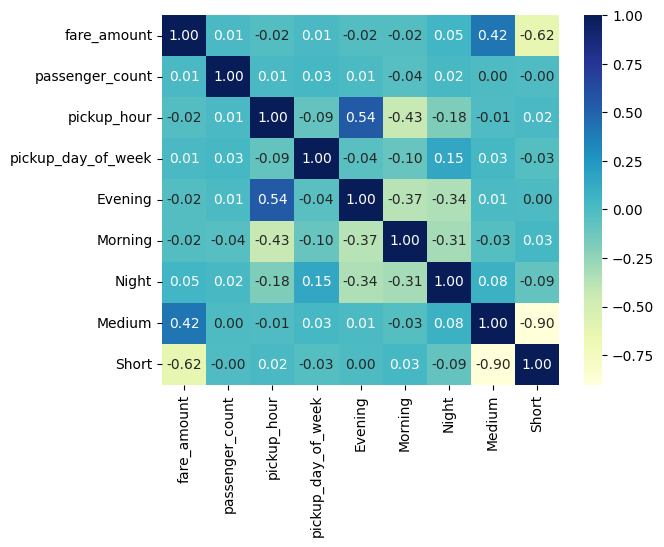

In [169]:
sns.heatmap(uber.corr(), cmap="YlGnBu", annot = True,fmt=".2f")

###Splitting the Data:-

As you know, the first basic step for regression is performing a train-test split.

In [170]:
df_train, df_test = train_test_split(uber, train_size = 0.7, test_size = 0.3, random_state = 42)

In [171]:
df_train.shape

(140000, 9)

In [172]:
df_test.shape

(60000, 9)

Feature Scaling:-

In [173]:
# StandardScaler to the predictors
scaler = StandardScaler()
df_train[['fare_amount','passenger_count']]=scaler.fit_transform(df_train[['fare_amount','passenger_count']])
df_test[['fare_amount','passenger_count']]=scaler.transform(df_test[['fare_amount','passenger_count']])
scaler

StandardScaler()

<Axes: >

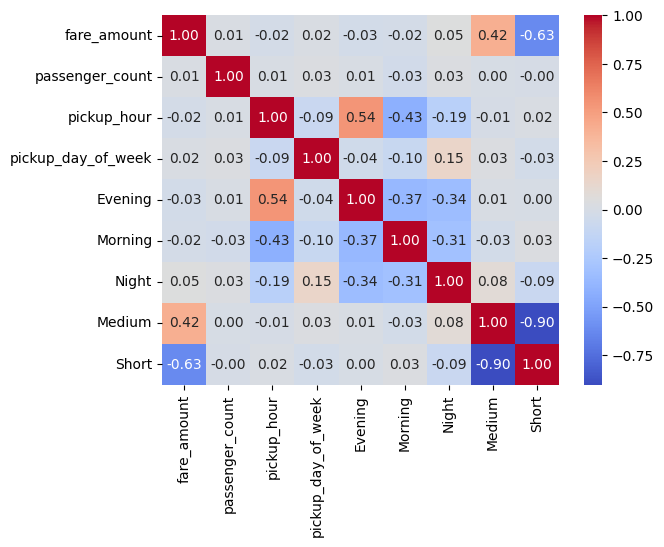

In [174]:
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm",fmt=".2f")

### Dividing into X and Y sets for the model building:-

In [175]:
y_train = df_train.pop('fare_amount')
X_train = df_train

In [176]:
X_train.head()

,passenger_count,pickup_hour,pickup_day_of_week,Evening,Morning,Night,Medium,Short
21269,-0.482371,8,5,0,1,0,1,0
187660,-0.482371,20,0,1,0,0,0,1
774,0.222430,2,5,0,0,1,1,0
184577,-0.482371,9,4,0,1,0,0,1
37127,-0.482371,8,4,0,1,0,0,1


In [177]:
y_train.head()

21269    -0.476242
187660   -0.816207
774       1.129148
184577   -0.589563
37127    -0.476242
Name: fare_amount, dtype: float64

##3. Building a linear model:-

Fit a regression line through the training data using `statsmodels`.Need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [178]:
X_train=X_train[['Medium','Short']]
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [179]:
# Check the parameters obtained
lr.params

const     2.029037
Medium   -1.594226
Short    -2.693099
dtype: float64

In [180]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                 7.288e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:42:48   Log-Likelihood:            -1.4870e+05
No. Observations:              140000   AIC:                         2.974e+05
Df Residuals:                  139997   BIC:                         2.974e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0290      0.008    246.285      0.0



The R-squared value obtained is `0.508`and Adj.R-squared is same here.we can clearly see the distance categories are the most correlated variables with fare amount.have the most significant correlation with the target variable.

### Adding all the variables to the model:

In [181]:
# Check all the columns of the dataframe
uber.columns

Index(['fare_amount', 'passenger_count', 'pickup_hour', 'pickup_day_of_week',
       'Evening', 'Morning', 'Night', 'Medium', 'Short'],
      dtype='object')

In [182]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr

In [183]:
# Check the parameters obtained
lr.params

const     2.029037
Medium   -1.594226
Short    -2.693099
dtype: float64

In [184]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                 7.288e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:42:51   Log-Likelihood:            -1.4870e+05
No. Observations:              140000   AIC:                         2.974e+05
Df Residuals:                  139997   BIC:                         2.974e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0290      0.008    246.285      0.0

Looking at the P-value are the zero, indicating that all coefficients are statistically significant. OLS Regression indicate approximately 51% of the variance in the fare amoun.Both the medium and short distance categories are significant

### Model Definition and Hyperparameter Tuning:-

In [185]:
# Apply Train a Random Forest Regression model
forest_model = RandomForestRegressor()
RandomForestRegressor()

RandomForestRegressor()

In [186]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_dist

{'n_estimators': [100, 200, 300, 400, 500],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

### Model Training:-

In [187]:
# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=40,
                                                   max_features='log2',
                                                   min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [188]:
# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=40,
                                                   max_features='log2',
                                                   min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [189]:
# Train the model with the best parameters
rf = random_search.best_estimator_
rf

RandomForestRegressor(max_depth=40, max_features='log2', min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

### Checking VIF:

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [190]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Medium,1.0
1,Short,1.0


VIF analysis are no multicollinearity issues in the regression model with respect to distance categories.It ensures that the regression coefficients for these variables are not biased or unreliable due to multicollinearity.

### Residual Analysis of the train data:

In [191]:
# Predict with linear Regression
y_pred=lr.predict(X_train_lm)
y_pred

21269     0.434810
187660   -0.664063
774       0.434810
184577   -0.664063
37127    -0.664063
            ...   
119879   -0.664063
103694   -0.664063
131932    0.434810
146867   -0.664063
121958    0.434810
Length: 140000, dtype: float64

Text(0.5, 0, 'Errors')

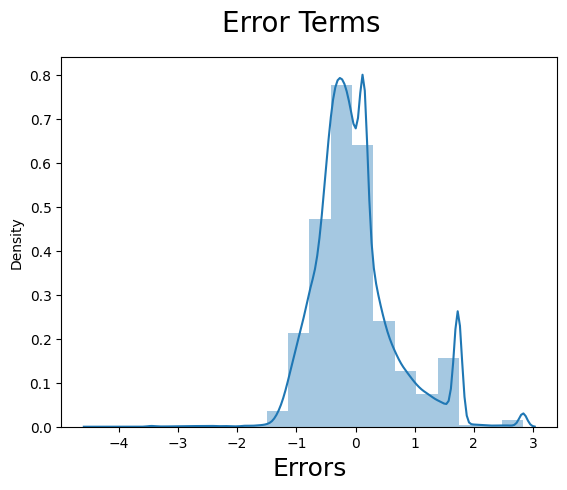

In [192]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

### Making Predictions Using the Final Model:
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final,

In [193]:
y_test=df_test.pop("fare_amount")

In [194]:
X_test=df_test

In [195]:
X_test = sm.add_constant(X_test)


In [196]:
# Check the features used to train the lr model
lr.params.index

Index(['const', 'Medium', 'Short'], dtype='object')

In [197]:
X_test.columns

Index(['const', 'passenger_count', 'pickup_hour', 'pickup_day_of_week',
       'Evening', 'Morning', 'Night', 'Medium', 'Short'],
      dtype='object')

In [198]:
X = X_test.drop(['passenger_count','pickup_hour','pickup_day_of_week','Evening','Morning', 'Night'], axis = 1)

In [199]:
X.head()

,const,Medium,Short
119737,1.0,0,1
72272,1.0,0,1
158154,1.0,1,0
65426,1.0,1,0
30074,1.0,0,1


In [200]:
# Check the features in X_test
X.columns

Index(['const', 'Medium', 'Short'], dtype='object')

In [201]:
# Now try predicting again
y_pred = lr.predict(X)

In [202]:
y_pred

119737   -0.664063
72272    -0.664063
158154    0.434810
65426     0.434810
30074    -0.664063
            ...   
97771     2.029037
59813     0.434810
103735    0.434810
180226    0.434810
119389   -0.664063
Length: 60000, dtype: float64

In [203]:
# Remove the 'const' column from X
X = X.drop('const', axis=1)

In [204]:
# Predict on the test set with Randomforrest
y_pred = rf.predict(X)
y_pred

array([-0.66400977, -0.66400977,  0.43519582, ...,  0.43519582,
        0.43519582, -0.66400977])

### Accuracy Checking:

Finding the MSE,MAE,RMSE,R2,etc.

In [205]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 0.4996991445814265


In [206]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 0.5152727354308518


In [207]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.7068940122687605


In [208]:
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.5000963690578268


Accuracy checking for which will help in assess how well regression model is performing in predicting the fare amount.

##4. Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

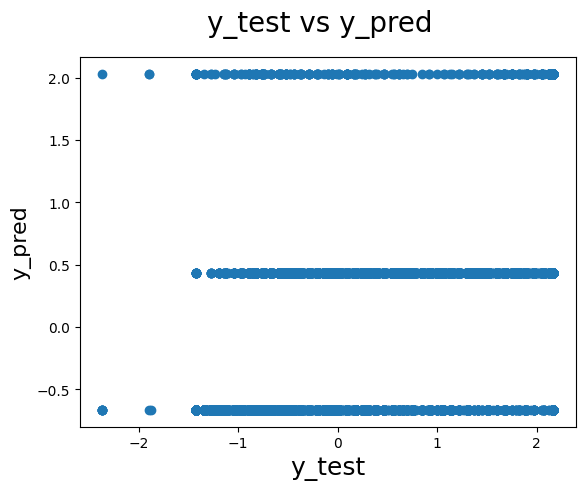

In [209]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)